In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

In [3]:
ds_xl = xr.open_dataset('files/ds_xl.nc')
ds_l = xr.open_dataset('files/ds_l.nc')
ds_m = xr.open_dataset('files/ds_m.nc')
ds_s = xr.open_dataset('files/ds_s.nc')
ds_xs = xr.open_dataset('files/ds_xs.nc')
ds_2c = xr.open_dataset('files/ds_2c.nc')

In [4]:
scales = [r'20x10$^{3}$ km$^{2}$', r'10x10$^{3}$ km$^{2}$', r'5x10$^{3}$ km$^{2}$', 
          r'500 km$^{2}$', r'50 km$^{2}$', r'5 km$^{2}$']
ts_all = xr.concat([ds_xl, ds_l, ds_m, ds_s, ds_xs, ds_2c], dim='size')
ts_all.coords['size']= scales

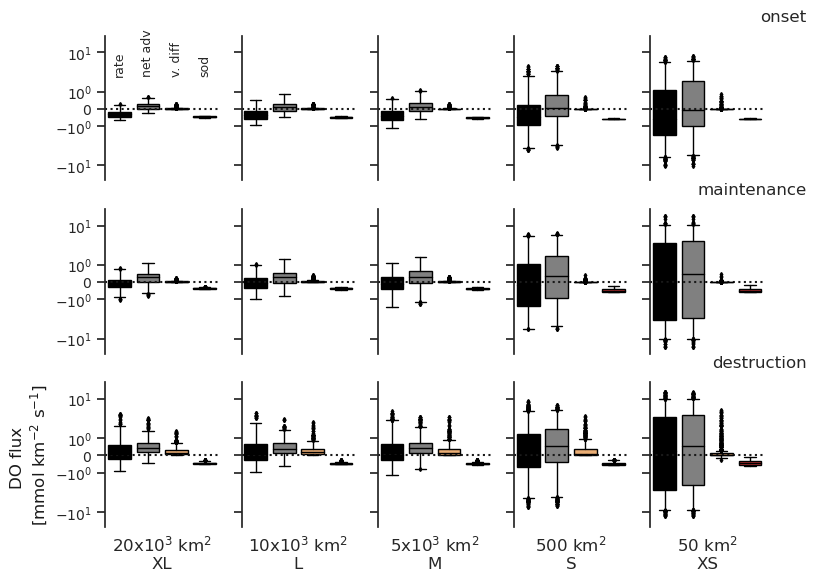

In [53]:
# colors = ['k', 'b', 'g', 'y', 'r', ]
sns.set(style="ticks")

llabels = ['rate', 'net adv', 'v. diff', 'sod',]
labels = [r'$\partial{Ox}/\partial{t}$',
          r'$\vec{v}\cdot \nabla Ox$',
          r'$Ak_v \, \partial{Ox}/\partial{z}$', 
          'SOD']
# llabels = [r'$\partial\left(\int_{-h}^{-z_{10}} O_2\,dz \right)/\partial t \,dA $',
#          r'$\oint \vec{v}\cdot \nabla O_2 \,dS$',
#          r'$Ak_v \, \frac{\partial{O_2}}{\partial{z}}|_{-z_{10}}\,dA $',
#          '$SOD\,dA$' ]

scales = [r'20x10$^{3}$ km$^{2}$', r'10x10$^{3}$ km$^{2}$', 
          r'5x10$^{3}$ km$^{2}$', r'500 km$^{2}$', r'50 km$^{2}$']
sn = ['XL', 'L', 'M', 'S', 'XS']
slices = [slice('2010-07-10','2010-08-03'), 
          slice('2010-08-04','2010-08-31'), 
          slice('2010-09-01','2010-09-30')]

months = ['onset', 'maintenance', 'destruction']
my_pal = {r'$\partial{Ox}/\partial{t}$': '#000000', 
          r'$\vec{v}\cdot \nabla Ox$':'grey',
          r'$Ak_v \, \partial{Ox}/\partial{z}$':'#fdae61', 
          'SOD':'#d7191c'}


# {"rate": "gray", "hadv": "b", "vadv":"g", "nadv": "teal", "vdiff":"y", "SOD":'r'}

fig, axes = plt.subplots(nrows=3, ncols=5, 
                         sharey=True, sharex=True,
                         figsize=(8.5,6.5), 
                         dpi=100)

for r in range(3):
    for c in range(5):
        data = (ts_all.sel(size=scales[c], 
                           ocean_time=slices[r]).drop('vadv*')*1000.
               ).squeeze().to_dataframe().drop(columns=['size', 's_rho'])
        data.insert(1, 'nadv', data.loc[:,['hadv', 'vadv']].sum(axis=1))
        data = data.drop(columns=['hadv', 'vadv'])
        data.columns = labels
        axes[r,c].axhline(color='k', linestyle =':')

        v = sns.boxplot(data=data, ax=axes[r,c], meanline=False, palette=my_pal, linewidth=1., fliersize=2.)
        axes[r,c].tick_params(bottom=False, labelbottom=False, labelleft=False, labelsize=10)
        axes[r,c].set_yscale('symlog')
        sns.despine(bottom=True)
        
        if c==0:
            axes[r,c+4].text(5,100., months[r], horizontalalignment='right', fontsize=12)
            axes[r,c].tick_params(labelleft=True)

        if r == 2:
            axes[r,c].set_xlabel(scales[c]+'\n'+sn[c])
            axes[r,c].xaxis.labelpad = 5

axes[0,0].tick_params(labeltop=True)
axes[0,0].set_xticklabels(llabels, rotation=90, va='bottom', fontsize=9)
axes[0,0].tick_params(axis='x', which='major', pad=-35)

axes[2,0].set_ylabel('DO flux \n' +r'[mmol km$^{-2}$ s$^{-1}$]', color='k')

fig.savefig('figures/flux_means.png')

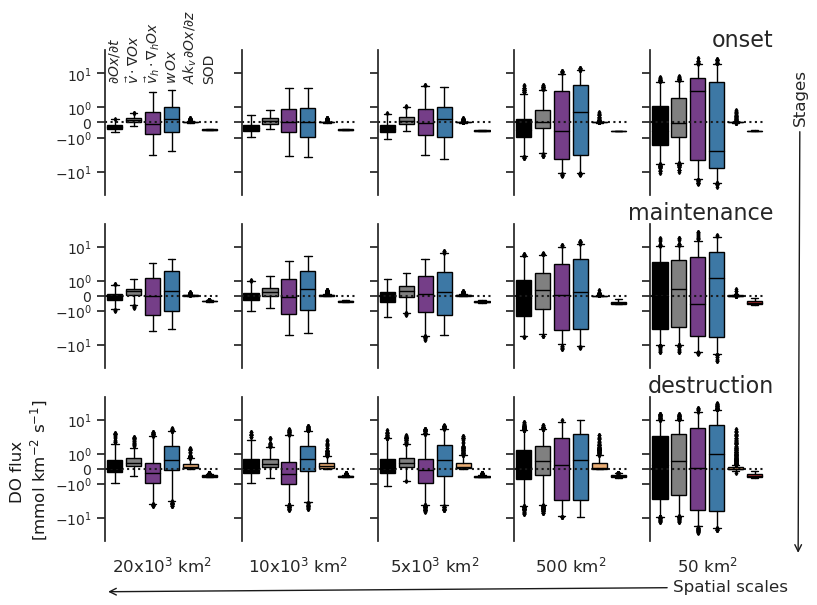

In [63]:
# colors = ['k', 'b', 'g', 'y', 'r', ]
sns.set(style="ticks")

labels = ['rate', 'nadv','hadv', 'vadv', 'vdiff', 'sod',]
labels = [r'$\partial{Ox}/\partial{t}$',
          r'$\vec{v}\cdot \nabla Ox$',
          r'$\vec{v}_h\cdot \nabla_h Ox$',
          r'$w \, Ox$',
          r'$Ak_v \, \partial{Ox}/\partial{z}$', 
          'SOD']
scales = [r'20x10$^{3}$ km$^{2}$', r'10x10$^{3}$ km$^{2}$', 
          r'5x10$^{3}$ km$^{2}$', r'500 km$^{2}$', r'50 km$^{2}$']
slices = [slice('2010-07-10','2010-08-03'), 
          slice('2010-08-04','2010-08-31'), 
          slice('2010-09-01','2010-09-30')]

months = ['onset', 'maintenance', 'destruction']
my_pal = {r'$\partial{Ox}/\partial{t}$': '#000000', 
          r'$\vec{v}\cdot \nabla Ox$':'grey',
          r'$\vec{v}_h\cdot \nabla_h Ox$':'#7b3294',
          r'$w \, Ox$':'#2c7bb6',
          r'$Ak_v \, \partial{Ox}/\partial{z}$':'#fdae61', 
          'SOD':'#d7191c'}


# {"rate": "gray", "hadv": "b", "vadv":"g", "nadv": "teal", "vdiff":"y", "SOD":'r'}

fig, axes = plt.subplots(nrows=3, ncols=5, 
                         sharey=True, figsize=(8.5,6.5), 
                         dpi=100)

for r in range(3):
    for c in range(5):
        data = (ts_all.sel(size=scales[c], 
                           ocean_time=slices[r]).drop('vadv*')*1000.
               ).squeeze().to_dataframe().drop(columns=['size', 's_rho'])
        data.insert(1, 'nadv', data.loc[:,['hadv', 'vadv']].sum(axis=1))
        data.columns = labels
        axes[r,c].axhline(color='k', linestyle =':')

        v = sns.boxplot(data=data, ax=axes[r,c], meanline=False, palette=my_pal, linewidth=1., fliersize=2.)
        axes[r,c].tick_params(bottom=False, labelbottom=False, labelleft=False, labelsize=10)
        axes[r,c].set_yscale('symlog')
        sns.despine(bottom=True)
        
        if c==0:
            axes[r,c+4].text(6,100., months[r], horizontalalignment='right', fontsize=16)
            axes[r,c].tick_params(labelleft=True)

        if r == 2:
            axes[r,c].set_xlabel(scales[c])
            axes[r,c].xaxis.labelpad = 10

axes[0,0].tick_params(labeltop=True)
axes[0,0].set_xticklabels(labels, rotation=90, va='bottom')
axes[0,0].tick_params(axis='x', which='major', pad=-30)

axes[2,0].set_ylabel('DO flux \n' +r'[mmol km$^{-2}$ s$^{-1}$]', color='k')

axes[-1,-1].annotate('Spatial scales', xy=(-4.8, -.35), 
                   xycoords=axes[-1,-1].transAxes, xytext=(.2, -.35), 
            arrowprops=dict(arrowstyle="->", color='k'))
axes[0,-1].annotate('Stages', xy=(1.3, -2.5), rotation=90,
                   xycoords=axes[0,-1].transAxes, xytext=(1.25, .5), 
            arrowprops=dict(arrowstyle="->", color='k'))


# fig.tight_layout(w_pad=.2, h_pad=.2)
fig.savefig('figures/flux_means_v2.png')

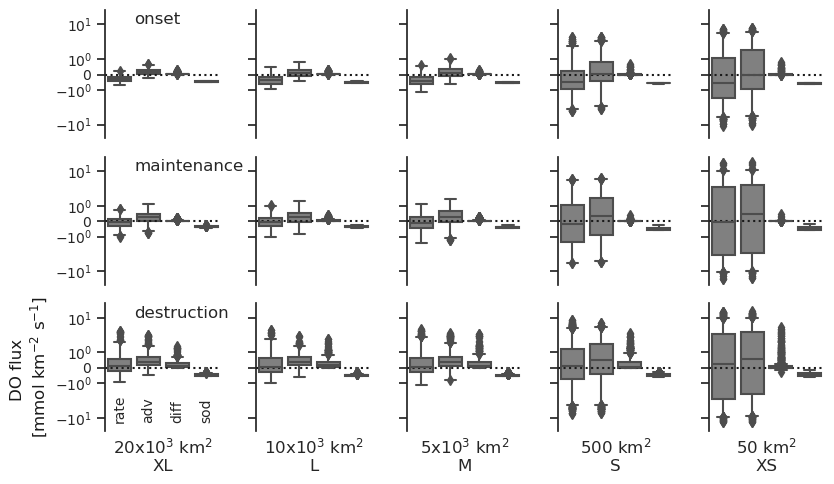

In [62]:
sns.set(style="ticks")

labels = ['rate', 'adv', 'diff', 'sod',]
scales = [r'20x10$^{3}$ km$^{2}$', r'10x10$^{3}$ km$^{2}$', 
          r'5x10$^{3}$ km$^{2}$', r'500 km$^{2}$', r'50 km$^{2}$']
slices = [slice('2010-07-10','2010-08-03'), 
          slice('2010-08-04','2010-08-31'), 
          slice('2010-09-01','2010-09-30')]
months = ['onset', 'maintenance', 'destruction']

colors = ['k', 'grey', 'grey', 'grey', 'grey']
fig, axes = plt.subplots(nrows=3, ncols=5, 
                         sharey=True, figsize=(8.5,5), 
                         dpi=100)

for r in range(3):
    for c in range(5):
        data = (ts_all.sel(size=scales[c], 
                           ocean_time=slices[r]).drop('vadv*')*1000.
               ).squeeze().to_dataframe().drop(columns=['size', 's_rho'])
        data.insert(1, 'adv', data.loc[:,['hadv', 'vadv']].sum(axis=1))
        data = data.drop(columns=['hadv', 'vadv'])
        
        axes[r,c].axhline(color='k', linestyle =':')

        sns.boxplot(data=data, ax=axes[r,c], color="gray")
        axes[r,c].tick_params(bottom=False, labelbottom=False, labelleft=False, labelsize=10)
        axes[r,c].set_yscale('symlog')
        sns.despine(bottom=True)
        
        if c==0:
            axes[r,c].text(.5, 10., months[r])
            axes[r,c].tick_params(labelleft=True)

        if r == 2:
            axes[r,c].set_xlabel(scales[c])
            axes[r,c].set_xlabel(scales[c]+'\n'+sn[c])
#             axes[r,c].xaxis.labelpad = 5
            
# axes[0,0].tick_params(labelleft=True)
# axes[2,0].tick_params(labelleft=True)

axes[2,0].tick_params(labelbottom=True)
axes[2,0].set_xticklabels(labels, rotation=90, va='bottom')
axes[2,0].tick_params(axis='x', which='major', pad=-12)

axes[2,0].set_ylabel('DO flux \n' +r'[mmol km$^{-2}$ s$^{-1}$]', color='k')

fig.tight_layout(w_pad=.2, h_pad=.2)
fig.savefig('figures/flux_means.png')

In [26]:
def filtered_std(ds, freq=0):
    if freq != 0:
        ds = ds.rolling(ocean_time=freq, center=True).mean()
    labels = ['rate', 'nadv','hadv', 'vadv', 'vdiff', 'SOD',]# 'vadv*']
    dic = {}
    for lb in labels:
        dic[lb] = ds[lb].std().item()
    return dic

def apply_filters(ds, filters, names):
    variance = {}
    for f, n in zip(filters, names):
        variance[n] = filtered_std(ds, freq=f)
    return variance

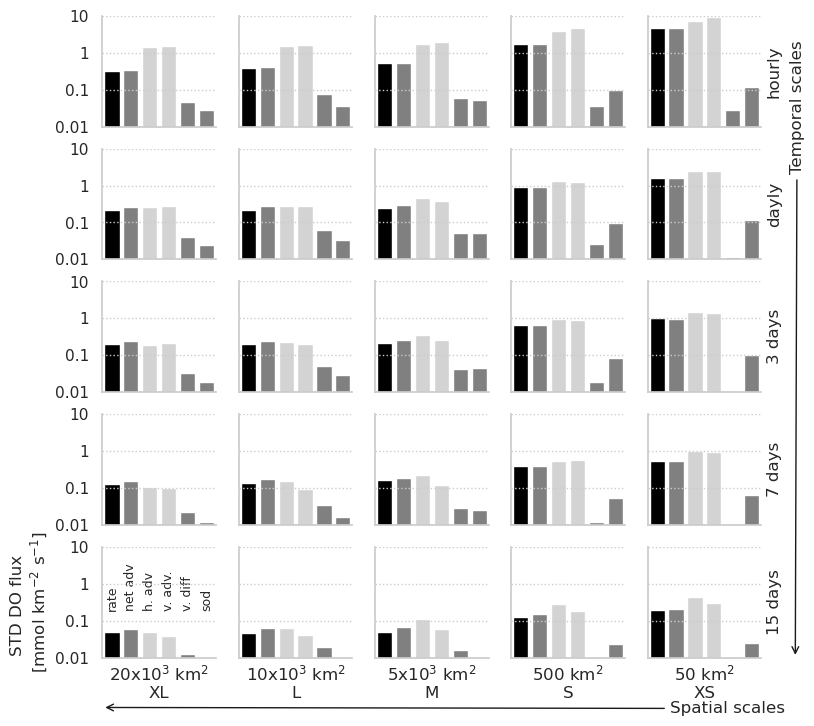

In [57]:
filters = [0, 24, 24*3, 24*7, 24*15]
names = ['hourly', 'dayly', '3 days', '7 days', '15 days']
scales = [r'20x10$^{3}$ km$^{2}$', r'10x10$^{3}$ km$^{2}$', r'5x10$^{3}$ km$^{2}$', 
          r'500 km$^{2}$', r'50 km$^{2}$',]
datasets = [ds_xl, ds_l, ds_m, ds_s, ds_xs,]


stds = {}
for s, ds in zip(scales,datasets):
    ds = ds.sel(ocean_time=slices[1])
    ds['nadv'] = ds.hadv + ds.vadv
    stds[s] = apply_filters(ds, filters, names);

labels = ['rate', 'nadv','hadv', 'vadv', 'vdiff', 'SOD',]
labels = [r'$\partial{Ox}/\partial{t}$', 
          r'$\vec{v}\cdot \nabla Ox$',
          r'$\vec{v}_h\cdot \nabla_h Ox$',
          r'$w \, Ox$',
          r'$Ak_v \, \partial{Ox}/\partial{z}$', 
          'SOD']

llabels = [r'$\partial\left(\int_{-h}^{-z_{10}} O_2\,dz \right)/\partial t \,dA $',
           r'$\oint \vec{v}\cdot \nabla O_2 \,dS$',
           r'$\iint \vec{v}\cdot \nabla O_2 \,dA$',
           r'$\iint \vec{v}_h\cdot \nabla_h O_2 \,dA$',
           r'$Ak_v \, \frac{\partial{O_2}}{\partial{z}}|_{-z_{10}}\,dA $',
         '$SOD\,dA$' ]

llabels = ['rate', 'net adv',
           'h. adv', 'v. adv.',
           'v. diff', 'sod',]

clrs = ['black', 'grey', 'lightgrey', 'lightgrey', 'grey', 'grey' ]
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8.5,8.5), dpi=100)
for i, s in enumerate(stds):
    for j, k in enumerate(stds[s]):
        
        bplot = sns.barplot(np.arange(len(stds[s][k])), np.asarray(list(stds[s][k].values()))*1000, ax=axes[j,i], 
                    palette=clrs, label=llabels, zorder=0);
        sns.despine()
        axes[j,i].set_yscale('log')
        axes[j,i].set_ylim(1e-2,10)
        axes[j,i].set_yticks([0.01, 0.1, 1, 10])
        axes[j,i].grid(axis='y', linestyle=':', linewidth=1)
#         axes[j,i].tick_params(labelleft=False)

        if i == 4:
            axes[j,i].yaxis.set_label_position("right")
            axes[j,i].set_ylabel(names[j])
            
        if j == 4:
#             axes[j,i].set_xlabel(s)
            axes[j,i].set_xlabel(scales[i]+'\n'+sn[i])
#             axes[r,c].xaxis.labelpad = 5
        axes[j,i].tick_params(bottom=False, labelbottom=False,)
axes[4,0].tick_params(labelleft=True)
axes[4,0].set_ylabel('STD DO flux \n' +r'[mmol km$^{-2}$ s$^{-1}$]')

axes[4,0].yaxis.set_major_formatter(
    ticker.FuncFormatter(
    lambda y,pos: (
        '{{:.{:1d}f}}'.format(
            int(np.maximum(-np.log10(y),0)))).format(y)))
axes[4,4].annotate('Spatial scales', xy=(-4.8, -.45), 
                   xycoords=axes[4,4].transAxes, xytext=(.2, -.5), 
            arrowprops=dict(arrowstyle="->", color='k'))
axes[0,4].annotate('Temporal scales', xy=(1.3, -4.8), rotation=90,
                   xycoords=axes[0,4].transAxes, xytext=(1.25, -.4), 
            arrowprops=dict(arrowstyle="->", color='k'))

axes[-1,0].tick_params(labelbottom=True, axis='x', which='major',
                      pad = -40, )
axes[-1,0].set_xticklabels(llabels, rotation=90, va='bottom', fontsize=9,
                          **{'zorder':10})

fig.savefig('figures/variance.png', bbox_inches='tight')